# Introduction 

In the simplest version of logistic regression, a typical data looks like this: 

$$ X, y = \{(x_{11}, x_{12}, ... , x_{1p}, y_1), ... .... ..., (x_{m1}, x_{m2}, ... , x_{mp}, y_m)\} $$


The difference with the linear regression is that the response variable $y_i$ takes the descrete values, for eg. 0 and 1. Again aim here is to fit the model and predict whether y is 0 or 1 given $X_i$ for new test set. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('ex2data1.txt', header = None, names = ['Test_score_1', 'Test_score_2', 'Admitted'])
df.sample(5)

,Test_score_1,Test_score_2,Admitted
62,56.253817,39.261473,0
42,94.443368,65.568922,1
65,66.560894,41.092098,0
59,71.796462,78.453562,1
50,79.944818,74.163119,1


# Data visualization 

Lookig at the data we can see that there exist some boundary which well separate the two types of data. Our aim is to fins such a boundary. In our case it is straight line. 

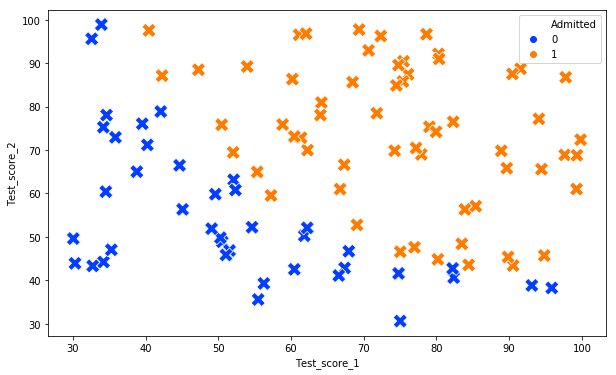

In [2]:
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='Test_score_1', y = 'Test_score_2', hue = 'Admitted', data = df, marker = 'X', s = 200, palette = 'bright')
plt.show()

# Sigmoid function 

The following function is called sigmoid or sometimes logistic curve. 

$$ g(z)=\frac{1}{1 + exp(-z)} $$

The plot the curve is shown below: 

In [3]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

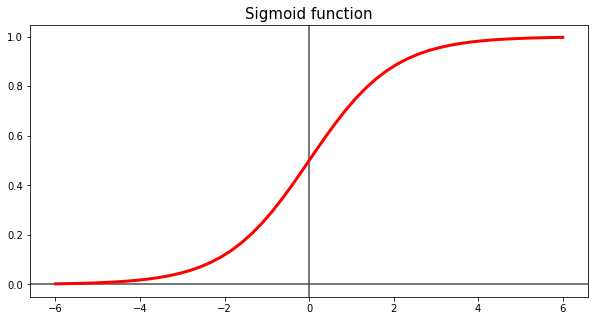

In [4]:
z_range = np.linspace(- 6, 6)

plt.figure(figsize = (10, 5))
plt.axhline(y = 0, color = '0.3')
plt.axvline(x = 0, color = '0.3')
plt.plot(z_range, sigmoid(z_range), color = 'r', linewidth = 3)
plt.title('Sigmoid function', size = 15)
plt.show()

# Cost function 

Decision boundary when passed under the sigmoid gives the hypothesis for the logistic function:

$$ h_{\theta}(x) = g(\theta^{T}x)$$

And the cost function is given by: 

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

In [5]:
def hypothesis(theta, X):
    
    Z = np.dot(X, theta)[:, np.newaxis]
    return sigmoid(Z)

In [6]:
def cost_function(theta, X, y):
    
    first_term = np.dot(np.log(hypothesis(theta, X)).flatten(), y)
    second_term = np.dot(np.log(1 - hypothesis(theta, X)).flatten(), 1 - y)
    
    return - 1/m *  (first_term + second_term)[0]

# Calculating cost function 

In [7]:
df.insert(0, 'Bias', 1)

X = df.drop(['Admitted'], axis = 1)
y = df[['Admitted']]
m = len(y)

theta = np.zeros(3)

In [8]:
cost_function(theta, X, y)

0.6931471805599453

# Gradient function 

$$ \frac{\partial J}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$

In [9]:
def gradient(theta, X, y):
    
    temp = hypothesis(theta, X) - y
    return 1/m * np.dot(temp.transpose(), X)[0]

In [10]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# Scipy optimization 

We can minimize the cost function by using the gradient descent method. But here we use scipy's optimization method to minimize the cost function. 

In [11]:
import scipy.optimize as opt

min_at = opt.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, args = (X, y))[0]

print('(Theta_0, Theta_1, Theta_2) : \t\t', min_at)
print('The minimum value of cost function: \t', cost_function(min_at, X, y))

(Theta_0, Theta_1, Theta_2) : 		 [-25.16131854   0.20623159   0.20147149]
The minimum value of cost function: 	 0.20349770158947494


# Decision boundary 

The equation for the decision boundary is: 

$$ \theta_0 + X_1 \theta_1 + X_2 \theta_2 = 0$$

given set of $X_1$ we can find $X_2$ using the following equation: 

$$ X_2 = - \frac{\theta_0 + \theta_1 X_1}{\theta_2} $$

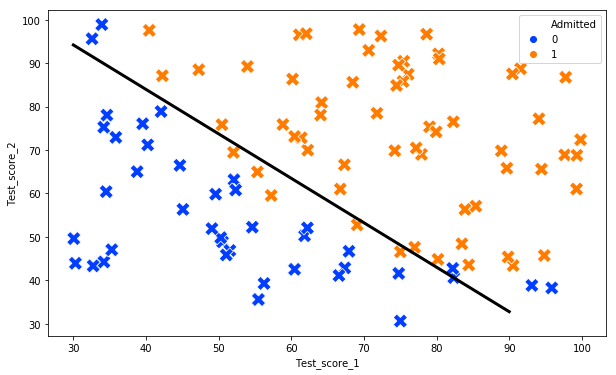

In [12]:
X1_range = [30, 90]
X2_range = -1/min_at[2] * (min_at[0] + np.dot(min_at[1], X1_range))

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='Test_score_1', y = 'Test_score_2', hue = 'Admitted', data = df, marker = 'X', s = 200, palette = 'bright')

plt.plot(X1_range, X2_range, 'k',  linewidth = 3)
plt.show()

# Performance of classifier 

In the following we show that the logistic regression classifier is correctly predicting 89% y's in training set. Once again, this does not mean it will classify 89% data correctly on the date it has not seen. 

In [13]:
def mis_classification(X, y, theta, cutoff):
    pred = hypothesis(theta, X) < cutoff
    return np.sum(pred == y)


print('Percentange of mis-classification : \t', mis_classification(X, y, min_at, 0.5), '%')
print('Percentage predicted accurately : \t', 100- mis_classification(X, y, min_at, 0.5), '%')

Percentange of mis-classification : 	 Admitted    11
dtype: int64 %
Percentage predicted accurately : 	 Admitted    89
dtype: int64 %


# Using scikit-learn 

Here we use scikit-learn LogisticRegression to solve the same problem. The default solver 'liblinear' performs poorly on this case. So, I have choosen solver = 'newton-cg'. Which performs similar to the previous one. 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(solver = 'newton-cg')

In [16]:
X = df[['Test_score_1', 'Test_score_2']]
y = df['Admitted']

model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[[0.2053533  0.20058239]]
[-25.05200379]


In [17]:
from sklearn.metrics import accuracy_score, r2_score

y_pred = model.predict(X)

print('Accuracy score : \t', accuracy_score(y, y_pred))
print('R squared : \t \t', r2_score(y, y_pred))

Accuracy score : 	 0.89
R squared : 	 	 0.5416666666666667


# Decision boundary

The coefficient looks different than the previous one. But the ratio of the coefficients is still the same. Which in turn gives the same boundary line. 

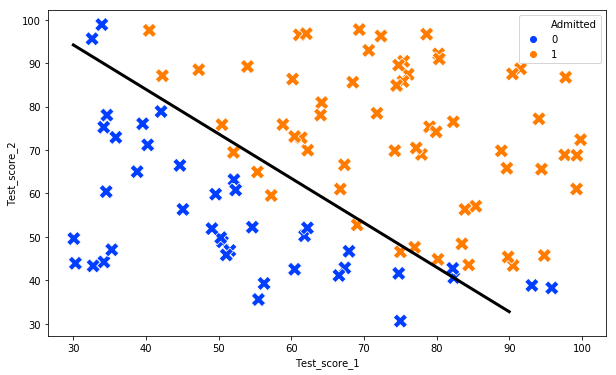

In [18]:
X1_range = [30, 90]
X2_range = - 1/model.coef_[0, 1] * (model.intercept_[0] + np.dot(model.coef_[0, 0], X1_range))

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='Test_score_1', y = 'Test_score_2', hue = 'Admitted', data = df, marker = 'X', s = 200, palette = 'bright')

plt.plot(X1_range, X2_range, 'k',  linewidth = 3)
plt.show()

# Statsmodels

Finally, statsmodels also can be used to solve the logistic regression problem. The coefficients are same in this solution as well as expected. 

In [19]:
import statsmodels.formula.api as smf

results = smf.logit('Admitted ~ Test_score_1 + Test_score_2', data = df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:                  0.6976
Time:                        14:20:33   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 4.067e-21
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -25.1613      5.799     -4.339      0.000     -36.526     -13.796
Test_score_1     0.2062      0.048      4.296      0.000       0.112       0.300
Test_score_2     0.2015      0.049      4.143      0.000       0.106       0.297
================================================================================
"""